In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_v10 = pd.read_csv("../../experiments/decoder-robustness-autoencoder-num_latents=16-wikipedia-v1.0-128.csv", index_col=0)
data_v11 = pd.read_csv("../../experiments/decoder-robustness-autoencoder-num_latents=16-wikipedia-v2.0-128.csv", index_col=0)
data_v12 = pd.read_csv("../../experiments/decoder-robustness-autoencoder-num_latents=16-wikipedia-v2.2.7-128.csv", index_col=0)
data_v13 = pd.read_csv("../../experiments/decoder-robustness-autoencoder-num_latents=16-wikipedia-v2.3.4-128.csv", index_col=0)

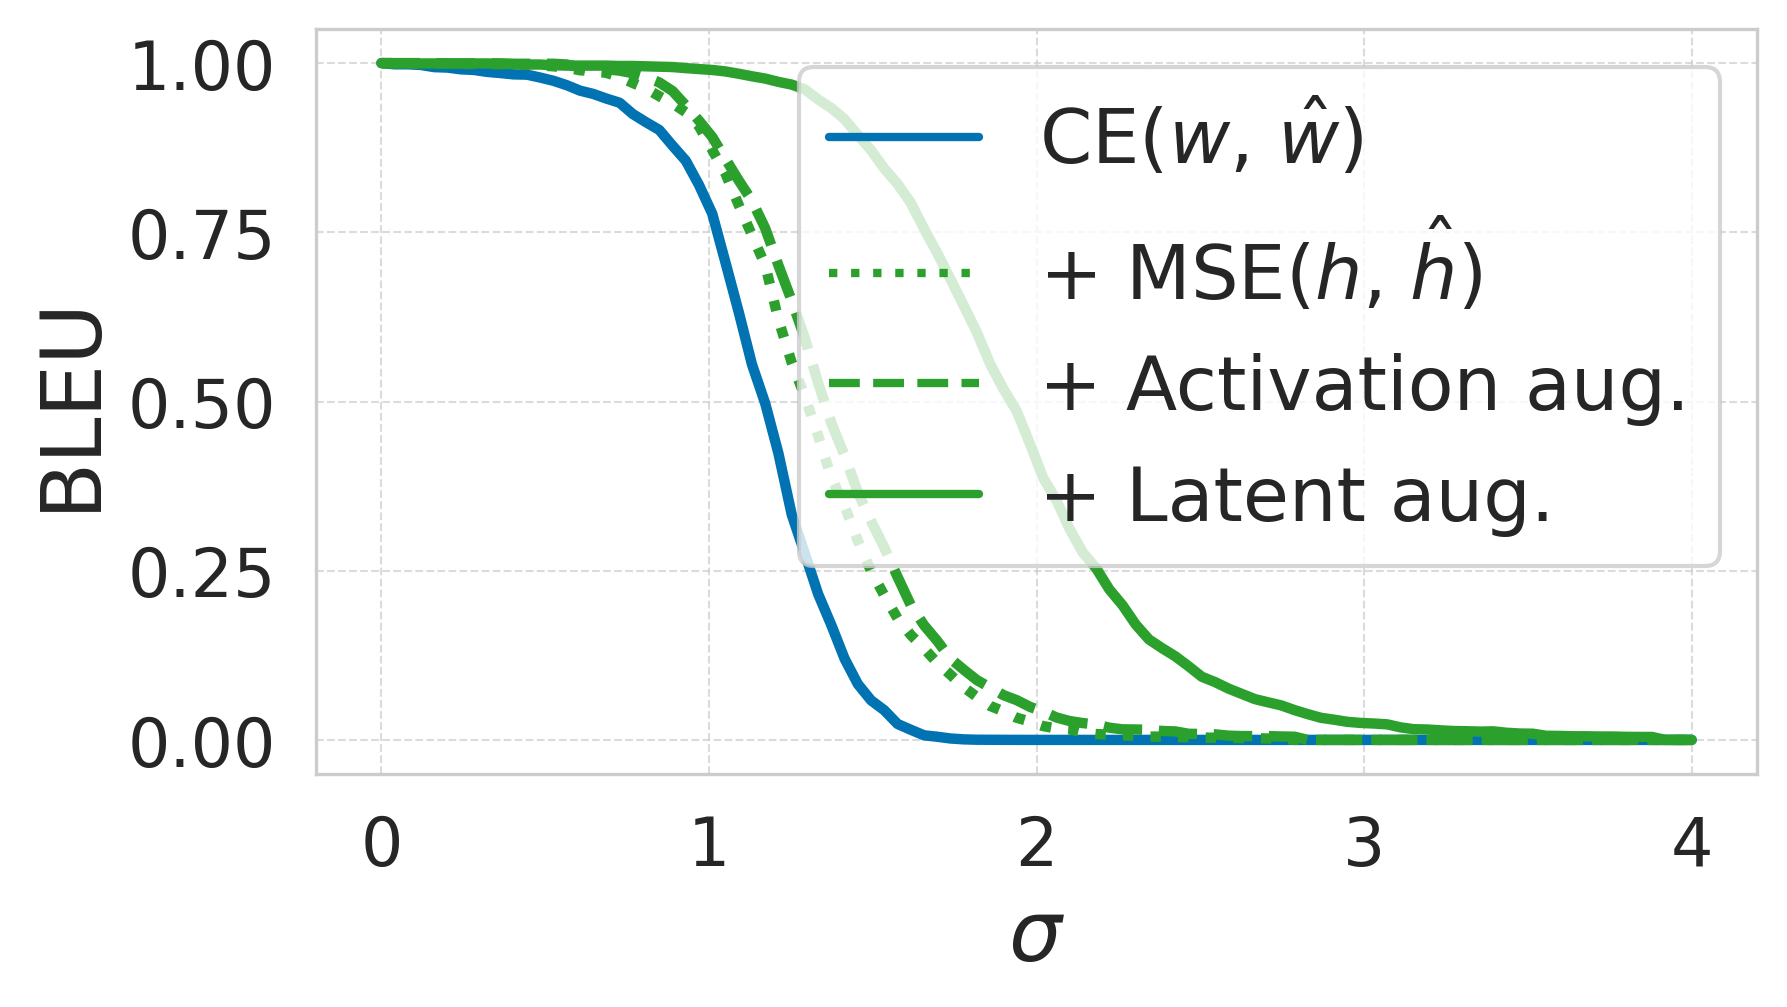

In [14]:
# In a new code cell:

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D

# 1. Global styling (match plot1-accuracy.ipynb)
sns.set_theme(style="whitegrid")
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})

# 2. Define your version-specific colors
blue  = '#0173b2'  # a pleasing blue for v1.0
green = '#2ca02c'  # a nice green for v1.3

# 3. Create the figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

# 4. Plot each version
#    - v1.0 → blue circles
#    - v1.3 → green squares
sns.lineplot(
    data=data_v10, x="delta", y="bleu",
    label="CE($w$, $\hat{w}$)", color=blue, ax=ax
)

sns.lineplot(
    data=data_v11, x="delta", y="bleu",
    label="+ MSE($h$, $\hat{h}$)", color=green, linestyle=":", ax=ax
)
sns.lineplot(
    data=data_v12, x="delta", y="bleu",
    label="+ Activation aug.", color=green, linestyle="--", ax=ax
)


sns.lineplot(
    data=data_v13, x="delta", y="bleu",
    label="+ Latent aug.", color=green, ax=ax
)

# 5. Labels, legend and grid
ax.set_xlabel("$\sigma$")
ax.set_ylabel("BLEU")
ax.grid(True, which='major', linestyle='--', alpha=0.7)

version_handles = [
    Line2D([0], [0], color=blue,  lw=2, linestyle='-',  label='CE($w$, $\\hat{w}$)'),
    Line2D([0], [0], color=green, lw=2, linestyle=':',  label='+ MSE($h$, $\\hat{h}$)'),
    Line2D([0], [0], color=green, lw=2, linestyle='--', label='+ Activation aug.'),
    Line2D([0], [0], color=green, lw=2, linestyle='-',  label='+ Latent aug.'),
]

legend_version = ax.legend(handles=version_handles,
                        #    title='Configuration',
                           title_fontsize=20,
                           loc='upper right',
                           frameon=True)


# 6) Save & show
plt.tight_layout()
# Save the figure at a higher resolution (600 DPI) for publication quality
# Set figure size to 200×100 pixels at save DPI
width_px, height_px = 3500, 2000
save_dpi = 600
plt.gcf().set_size_inches(width_px / save_dpi, height_px / save_dpi)

plt.savefig('decoder_robustness.pdf', dpi=600, bbox_inches='tight')

plt.show()